# 【DEO1611】The Language of Technical Computing (數學應用軟體簡介)



### ※ Note
* Upload your jupyter notebook before **12:00 noon 3/18**
* Late assignment would get 0% 
* Plagiarism(抄襲) is strictly prohibited, that is 0%
* You are encouraged to discuss with your partners (_Act together we go far_)
* Remember save your output and add comments beside your source code

## Python tutorial - Quiz1




### (30%) Question1: Narcissistic number (水仙花數) 



The definition of narcissistic number has the form:

$$
\begin{equation}
F_{b}(n) = \sum_{i=0}^{k-1}{d_{i}^{k}}
\end{equation}
$$
where $k = \lfloor \log_{b}{n} \rfloor + 1$ is the number of digits in the number in base $b$. (n是幾位數的意思)

For example, the number 407 in base-10 is a narcissistic number, 

<center>$4^3 + 0^3 + 7^3 = 64 + 0 + 343 = 407$</center>

---
Please list all the narcissistic number below 100,000 in base-10.

(Tip: you should find 20 numbers including 0, 

* https://mathworld.wolfram.com/NarcissisticNumber.html

* https://en.wikipedia.org/wiki/Narcissistic_number)

In [93]:
import math
narcissistic = list()
#log can only calculate natural number-> consider 0 independently 
#range to 100000+1 so that 100000 can be included
for i in range (100000+1):
  if i==0:
    narcissistic.append(i)
  else:
    #the interger part is the interger that is nearest but smaller than the result of log 
    k=int(math.log(i,10))+1
    #change interger to string
    s=str(i)
    sum=0
    #calculate the power of k of each digit respectively and sum them up
    for n in range(len(s)):
      sum+=int(s[n])**k
    #if the sum is same as i, we can know that i is a narcissistic number, add i to the narcissistic list
    if sum==i:
      narcissistic.append(i)
#print the results
print(f'There are {len(narcissistic)} narcissistic numbers')
print('Narcissistic sequence:', narcissistic)

There are 20 narcissistic numbers
Narcissistic sequence: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 153, 370, 371, 407, 1634, 8208, 9474, 54748, 92727, 93084]


### (20%) Question2: Fibonacci sequence(費波那契數列)

The Fibonacci numbers $F_n$ can be calculated from the recurrence relation below:

$$
F_{n} = 
\begin{cases}
0, \; n = 0 \\
1, \; n = 1 \\
F_{n-1} + F_{n-2}, \; \textrm{for n > 1}
\end{cases}
$$

For example, the Fibonacci sequence looks like:

<center>
$0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55...$
</center>

---
But now, we want to modify the initial conditions of $F_{0}$ and $F_{1}$,
assuming $F_{0}=2$ and $F_{1}=12$.

Please list the first 15 Fibonacci numbers as a sequence, that is from $F_0$ to $F_{14}$.

(Tip: useful website for validation, https://www.dcode.fr/fibonacci-numbers)

In [94]:
# DP method
nth = 15
fib = [0 for _ in range(nth)] # initialize

for i in range(nth):
  #f0=2
  if i==0:
    fib[i]=2
  #f1=12
  elif i==1:
    fib[i]=12
  #fn=fn-1 + fn-2, for all n>=2
  else:
    fib[i]=fib[i-1]+fib[i-2]
# -----------------------------------------------
print(f'The first {nth} Fibonacci sequence:', fib)

The first 15 Fibonacci sequence: [2, 12, 14, 26, 40, 66, 106, 172, 278, 450, 728, 1178, 1906, 3084, 4990]


### (20%) Question3: Bubble sort (氣泡排序)

Bubble sort is the simplest sorting algorithm that repeatly swap two numbers if they are in wrong order.

From the animition below, it can be found that number $6$ is like 
a bubble continuously moving right if there is a number larger than 
$6$.

If you swap two elements from `num[0]` to `num[n-1]`, the largest num would locate at the last position. (why?)

Thus, if you repeat many times, each time the largest one would locate at the last position. The array then can be sorted from smallest to largest number.

![](https://upload.wikimedia.org/wikipedia/commons/c/c8/Bubble-sort-example-300px.gif)

(from [wiki](https://en.wikipedia.org/wiki/Bubble_sort))


Please sort the array `[6, 5, 3, 1, 8, 7, 2, 4]` by bubble sort using the given format. (Directly use off-the-shelf  function is not allowed)


---
hint: `range(start, stop, step)`

negative step in range is valid!
```python
for i in range(10, -1, -1):
    print(i)
```

In [95]:
num = [6, 5, 3, 1, 8, 7, 2, 4]

#compare between each two numbers from left to right
#num list contains 8 elements but the last element is num[7], so the range is at most len(num)-1
for i in range(len(num)-1,-1,-1):
  for j in range(i):
    #if the left one is bigger than swap it with the right one
    if num[j]>num[j+1]:
      num[j],num[j+1]=num[j+1],num[j]
#------------------------------------------------
print("Sorted result:", num)

Sorted result: [1, 2, 3, 4, 5, 6, 7, 8]


### (30%) Question4: Numerical integration (數值積分)

The Riemann sum(黎曼和) has the form

$$
\begin{equation}
\int^{b}_{a}f(x)\,dx = 
\lim_{n\to\infty}\sum^{n}_{i=1}f(x^{*}_{i})\Delta{x} \approx
\sum^{n}_{i=1}f(x^{*}_{i})\Delta{x}, \\
\text{where sample points} \; x^{*}_{i} \in [x_{i-1},x_{i}], \; x_{i}=a+i\Delta{x}, i=1,\dots, n, \text{and} \; \Delta{x}=\dfrac{b-a}{n}.
\end{equation}
$$

---
In the following questions, we are going to examine the integral of
$$\sin^{2}{x} \in [0, 2\pi]$$

Actually, the exact solution is $\int_{0}^{2\pi}{\sin^{2}x} \;dx = \pi$🧐

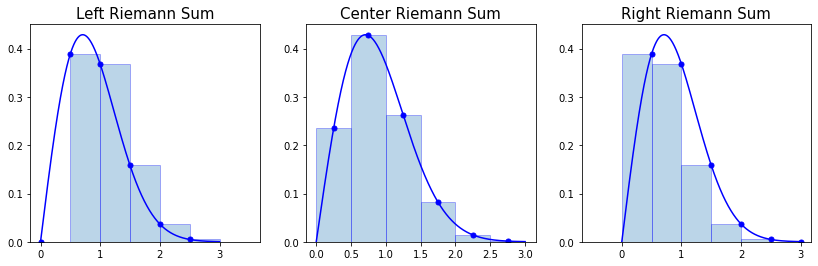

#### (10%) 1. Create an array of the above formula in $[0,2\pi]$, and the spacing $\Delta x$ is $0.00001$


Hint:
* `np.linspace(start, stop, num)`
$$num = \left\lfloor \dfrac{stop-start}{step} \right\rfloor +１$$
* `np.floor()` or `int()`

(Reference: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [96]:
import numpy as np

#a, b forms the interval [0,2pi], dx=delta x=0.00001
a = 0
b = 2 * np.pi
dx = 0.00001

# finish codes below! ---------------------------
num = int((b-a)/dx)+1
x = np.linspace(a, b, num)
f = np.sin(x)**2
#------------------------------------------------


#### (10%) 2. Left endpoint rule (左端法)

The formulas of left endpoint rule are shown below

$$
\begin{equation}
L_{n}=\sum^{n}_{i=1}f(x_{\mathbf{i-1}})\Delta{x}
\end{equation}
$$

Use left endpoint rule to compute the integral by using the array in Question4-1.

---
Hint:
Our data points are $x_0, x_1, x_2, \cdots, x_{n-1}, x_n$, but you can see that the last element ($x_n$) is not used in left endpoint rule. Therefore, the last element is exclusive in the calculation.

* Slicing to exclude the last element
* `np.sum()`


In [97]:
# finish codes below! ---------------------------
#left sum does not contain the last element Xn(x[-1])
left_int = np.sum(f[:-1]*dx)
#------------------------------------------------
print("The integral value by left endpoint rule is: %.5f" % left_int)

The integral value by left endpoint rule is: 3.14159


#### (10%) 3. Right endpoint rule (右端法)

The formulas of left endpoint rule are shown below

$$
\begin{equation}
R_{n}=\sum^{n}_{i=1}f(x_{\mathbf{i}})\Delta{x}
\end{equation}
$$

Use right endpoint rule to compute the integral by using the array in Question4-1.

---
Hint:
Our data points are $x_0, x_1, x_2, \cdots, x_{n-1}, x_n$, but you can see that the first element ($x_0$) is not used in right endpoint rule. Therefore, the first element is exclusive in the calculation.

* Slicing to exclude the first element
* `np.sum()`


In [98]:
# finish codes below! ---------------------------
#right sum does not contain the first element X[0]
right_int = np.sum(f[1:]*dx)
#------------------------------------------------
print("The integral value by right endpoint rule is: %.5f" % right_int)

The integral value by right endpoint rule is: 3.14159


### (5%) Bonus: Recursive function (遞迴函數)
A recursive function is a function that calls itself during its execution. The process may repeat several times, outputting the result and the end of each iteration. The Towers of Hanoi is a classical example for python beginner.


<center>
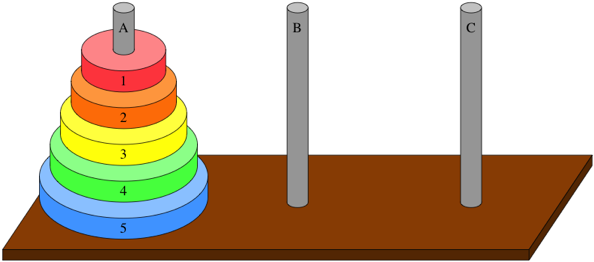
</center>

Problem: move $n$ disks from A to C

There are two rules should be followed:

1. Only one disk can be moved at a time  
2. No larger disk can be placed on the top of smaller disk  


$$
M_{n} = 
\begin{cases}
1, \; \textrm{n = 1} \\
2M_{n-1} + 1, \; \textrm{n>1} \\
\end{cases}
$$


Please use the above formula to compute $M_{30}$

(Note: Only the code and anwser are both correct would get 10%)

In [99]:
# Advanced method - recursive
def Hanoi(x):
  #there will be no moves if there aren't any disk
  if x<1:
    exit
  #when there is only 1 disk, move=1
  elif x==1:
    return 1
    '''when there are x disks and x is greater than 1, 
    the moves of x disks is the double of the moves of x-1 disks plus 1
    since adding 1 more disk is basically moving the previous disks to B, 
    the additional disk to C, and all disks on B to C'''
  else:
    return 2*Hanoi(x-1)+1
    # -----------------------------------------------
print(f'The M(30) is:', Hanoi(30))

The M(30) is: 1073741823


#### (5%) Bonus: Midpoint rule (中點法)

$$
\begin{align}
M_{n}&=\sum^{n}_{i=1}f(\bar{x}_{\mathbf{i}})\Delta{x}, \;
\text{where} \; \bar{x}_{i} = \dfrac{x_{i-1}+x_{i}}{2}
\end{align}
$$

Please use the midpoint rule to calculate the approximate integration of $f(x)$  in Question 4-1, where $x\in[0,2\pi]$

(Hint: slicing `arr[start:end:step]`)

In [100]:
# finish codes below! ---------------------------
#x_right=x1~xn
#x_left=x0~xn-1
x_right = x[1:]
x_left = x[:-1]
# Find the midpoint for x_right and x_left
#x_mid=(x_right+x_left)/2
x_mid = (x_right + x_left) * 0.5
x=x_mid
int_mid =np.sum(f*dx)
# -----------------------------------------------
print("The integral value by midpoint rule is: %.5f" % int_mid)

The integral value by midpoint rule is: 3.14159


### (5%) Bonus: Numerical integration - Simpson's rule (辛普森法)


<center><img height="auto" width="300px" src="https://media4.giphy.com/media/JwwYTeuOHhEB2/200.webp?cid=ecf05e47dssg4teo90mhtewiepxnjeuoim5z3so8d8cbb2vi&rid=200.webp&ct=g"></center>

<br/>
The formulas of Simpson's rule is shown below

$$
\begin{align}
S_{n}=\dfrac{\Delta{x}}{3}\left[f(x_{0}) + 4f(x_{1}) + 2f(x_{2}) + 4f(x_{3}) + 2f(x_{4}) + \cdots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_{n})\right]
\end{align}
$$

Please use the Simpson's rule to calculate the approximate integration of $f(x)$  in Question 4-1, where $x\in[0,2\pi]$

---
(Hint: slicing `arr[start:end:step]`)

1. The terms with coefficient 4 are $f(x_{1}), f(x_{3}), f(x_{5}), \cdots, f(x_{n-3}), f(x_{n-1})$

2. The terms with coefficient 2 are $f(x_{2}), f(x_{4}), f(x_{6}), \cdots, f(x_{n-4}), f(x_{n-2})$

3. The terms with coefficient 1 are $f(x_0)$ and $f(x_n)$

In [101]:
import numpy as np

# finish codes below! ---------------------------
#a1 are xi where i is odd number
a1 = 4*np.sum(f[1:num-1:2]) # array for coefficient 4
#a2 are xi where i is even number
a2 = 2*np.sum(f[:num-2:2]) # array for coefficient 2
#Sn=(f0+a1+a2+fn)*dx/3
sim_int =(f[0]+a1+a2+f[num-1])*dx/3

#------------------------------------------------
print("The integral value by Simpson's rule is: %.5f" % sim_int)

The integral value by Simpson's rule is: 3.14159
